In [7]:
import pandas as pd
t=pd.read_csv("spotify_churn_dataset.csv")

In [8]:
t

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [9]:
t.shape

(8000, 12)

In [10]:
t.isnull().sum()

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

In [11]:
t.duplicated().sum()

np.int64(0)

In [13]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


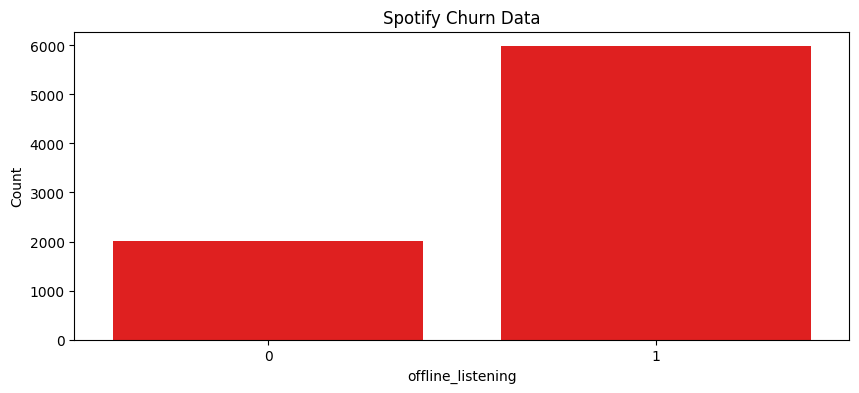

In [14]:
plt.figure(figsize=(10,4))
sns.countplot(x="offline_listening",data=t,color='red')
plt.title('Spotify Churn Data')
plt.xlabel('offline_listening')
plt.ylabel('Count')
plt.show()

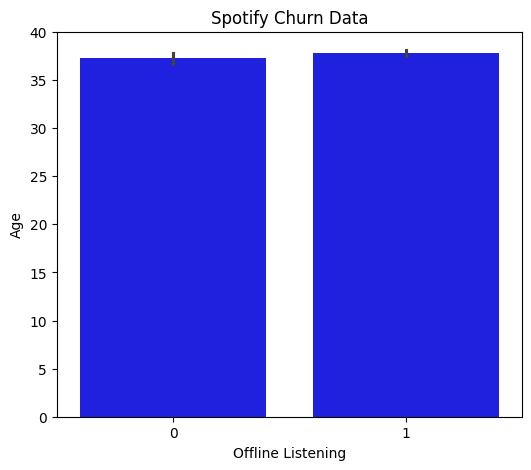

In [15]:
plt.figure(figsize=(6,5))
sns.barplot(x="offline_listening",y='age',data=t,color='blue')
plt.title('Spotify Churn Data')
plt.xlabel('Offline Listening')
plt.ylabel('Age')
plt.show()

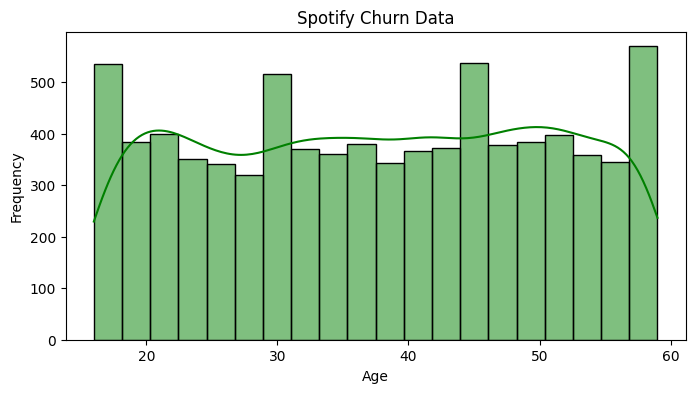

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(t['age'],bins=20,kde=True,color='green')
plt.title('Spotify Churn Data')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [17]:
counts=t['subscription_type'].value_counts()
counts

subscription_type
Premium    2115
Free       2018
Student    1959
Family     1908
Name: count, dtype: int64

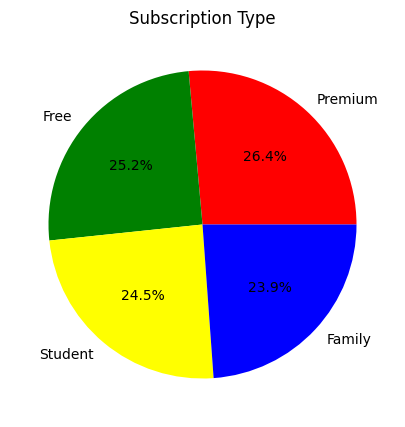

In [18]:
Subscription_counts = t['subscription_type'].value_counts()
plt.figure(figsize=(6,5))
plt.pie(Subscription_counts, labels=['Premium', 'Free', 'Student','Family'],colors=['red', 'green','yellow','blue'],autopct='%1.1f%%')
plt.title('Subscription Type')
plt.show()

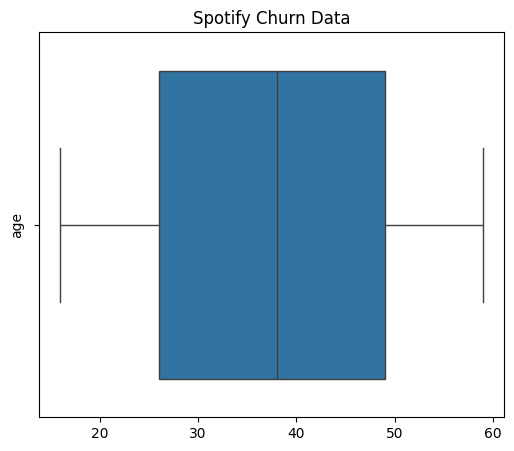

In [19]:
plt.figure(figsize=(6,5))
sns.boxplot(x='age', data=t)
plt.title('Spotify Churn Data')
plt.xlabel('')
plt.ylabel('age')
plt.show()

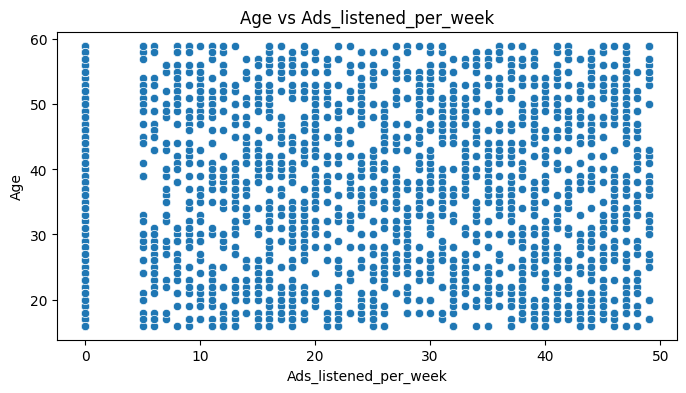

In [20]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='ads_listened_per_week', y='age',data=t)
plt.title('Age vs Ads_listened_per_week')
plt.xlabel('Ads_listened_per_week')
plt.ylabel('Age')
plt.show()

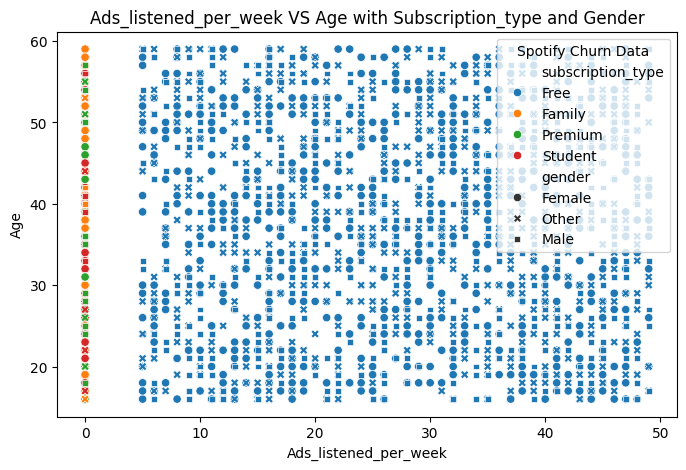

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='ads_listened_per_week', y='age', hue='subscription_type',style='gender',data=t)
plt.title('Ads_listened_per_week VS Age with Subscription_type and Gender')
plt.xlabel('Ads_listened_per_week')
plt.ylabel('Age')
plt.legend(title='Spotify Churn Data')
plt.show()

In [22]:
numerical=t[['age','offline_listening','skip_rate','offline_listening']].corr()
numerical

,age,offline_listening,skip_rate,offline_listening
age,1.000000,0.017061,-0.019557,0.017061
offline_listening,0.017061,1.000000,-0.002657,1.000000
skip_rate,-0.019557,-0.002657,1.000000,-0.002657
offline_listening,0.017061,1.000000,-0.002657,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

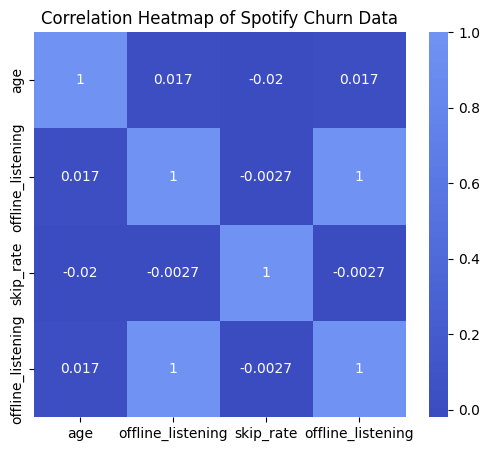

In [23]:
plt.figure(figsize=(6,5))
sns.heatmap(numerical,annot=True,cmap='coolwarm',center=3)
plt.title('Correlation Heatmap of Spotify Churn Data')
plt.show

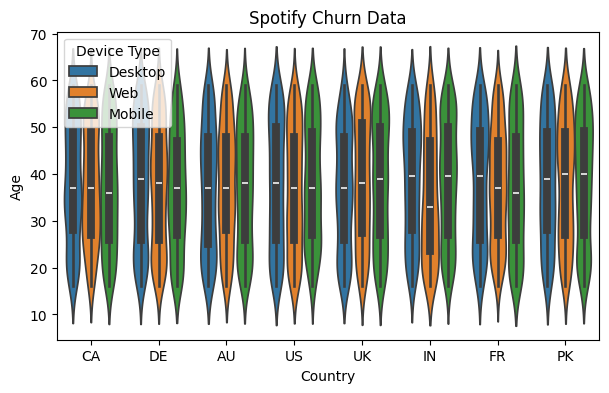

In [24]:
plt.figure(figsize=(7,4))
sns.violinplot(x="country",y='age',hue='device_type',data=t,split=False)
plt.title('Spotify Churn Data')
plt.xlabel('Country')
plt.ylabel('Age')
plt.legend(title='Device Type')
plt.show()

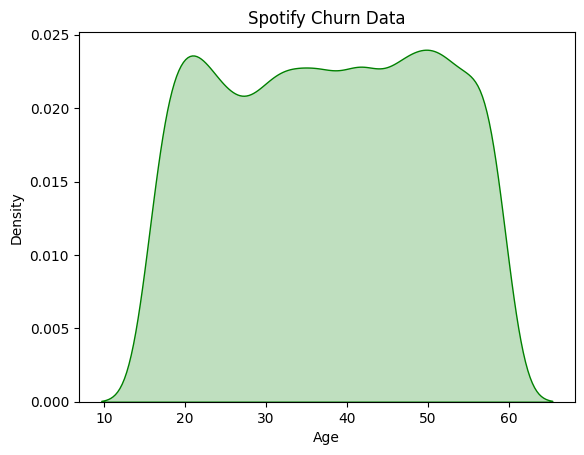

In [25]:
sns.kdeplot(data=t['age'],color='green',fill=True)
plt.title('Spotify Churn Data')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

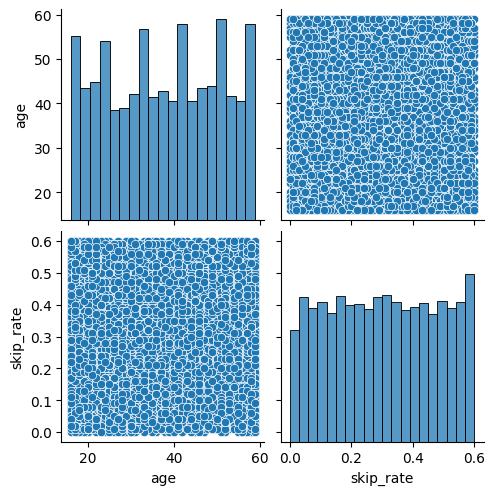

In [26]:
sns.pairplot(t[['age','skip_rate']])

C:\Users\user\AppData\Roaming\Python\Python314\site-packages\seaborn\categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python314\site-packages\seaborn\categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python314\site-packages\seaborn\categorical.py:3399: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python314\site-packages\seaborn\categorical.py:3399: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Roaming\Python

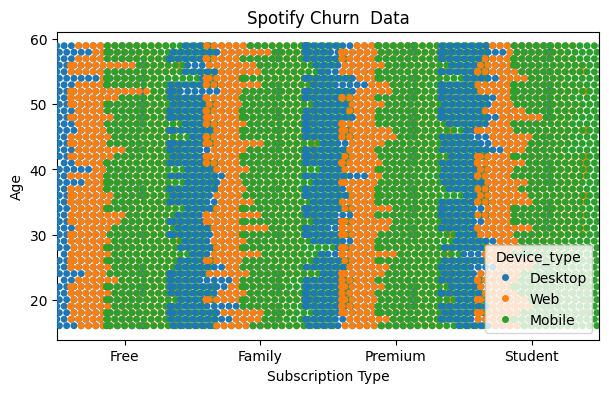

In [27]:
plt.figure(figsize=(7,4))
sns.swarmplot(x="subscription_type",y='age',hue='device_type',data=t,dodge=True)
plt.title('Spotify Churn  Data')
plt.xlabel('Subscription Type')
plt.ylabel('Age')
plt.legend(title='Device_type')
plt.show()